**Stock Market Forecasting with LSTM Algorithm and Moving Average Indicators**


In [ ]:
import math
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt

**Data extraction from data reader and Yahoo in online form and data preprocessing**

In [ ]:

# Dataset Generating


#df=pd.read_csv('TSLA.csv')
#print(df)
#data= pd.read_csv('stock_data.csv')
data = pdr.get_data_yahoo('SPY', start='2012-01-01', end='2022-12-17')
print(data)













[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03  127.760002  128.380005  127.430000  127.500000  103.202324   
2012-01-04  127.199997  127.809998  126.709999  127.699997  103.364197   
2012-01-05  127.010002  128.229996  126.430000  128.039993  103.639397   
2012-01-06  128.199997  128.220001  127.290001  127.709999  103.372284   
2012-01-09  128.000000  128.179993  127.410004  128.020004  103.623238   
...                ...         ...         ...         ...         ...   
2022-12-12  394.109985  398.950012  393.410004  398.950012  395.616516   
2022-12-13  410.220001  410.489990  399.070007  401.970001  398.611298   
2022-12-14  401.609985  405.500000  396.309998  399.399994  396.062775   
2022-12-15  394.299988  395.250000  387.890015  389.630005  386.374390   
2022-12-16  385.179993  386.579987  381.040

In [ ]:
df=data
df.shape

(2759, 6)

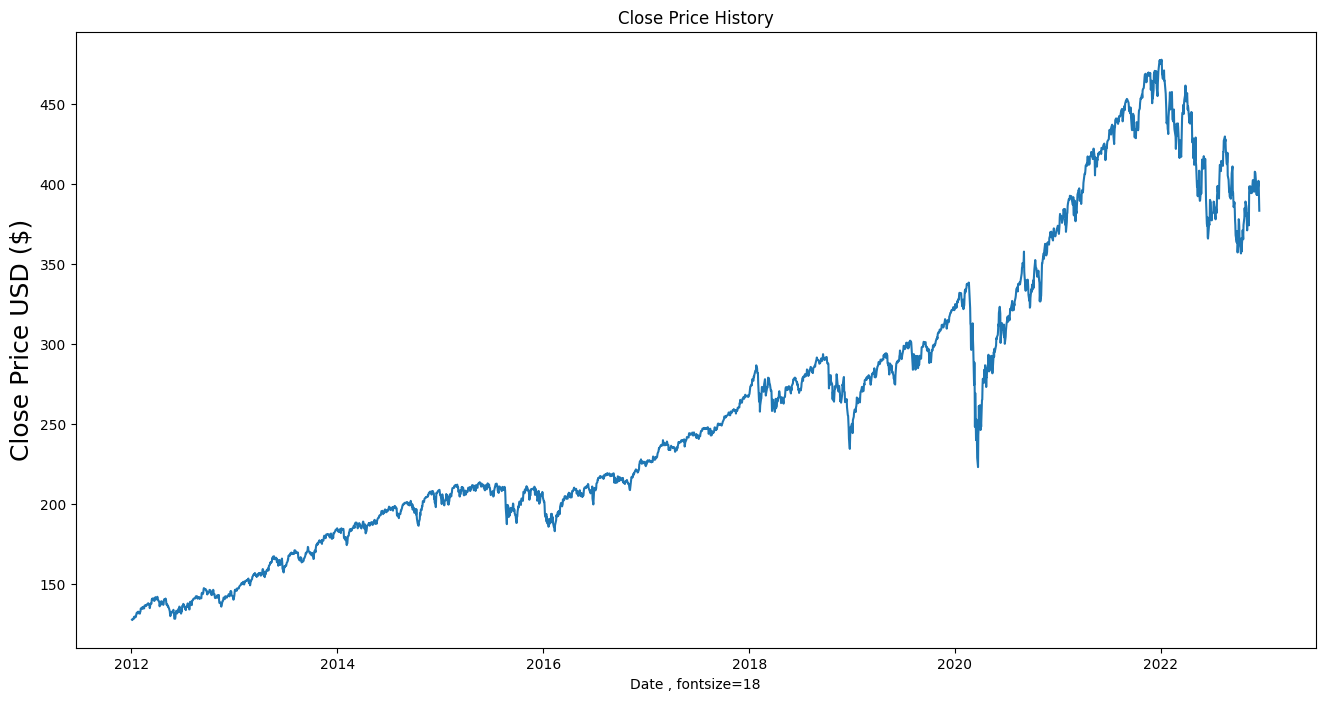

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date , fontsize=18')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# creat the 'Close Cloumn'
data=df.filter(['Close'])

# convert to numpy
dataset=data.values

# the number of rows to be trained
training_data_len= math.ceil(len(dataset)*.8)
training_data_len

2208

In [ ]:
# scale the data
scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=scalar.fit_transform(dataset)

scaled_data


array([[0.00000000e+00],
       [5.71077220e-04],
       [1.54191285e-03],
       ...,
       [7.76391310e-01],
       [7.48493793e-01],
       [7.30333215e-01]])

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

**predict the stock market using LSTM, data preparation is essential for the training process and creating the algorithm model**

In [ ]:
# creat scaled data for training

train_data=scaled_data[0:training_data_len,:]
a=train_data
print(a.shape)
# split data to x_train , x_test
x_train=[]
y_train=[]
a=print(train_data)
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()



(2208, 1)
[[0.00000000e+00]
 [5.71077220e-04]
 [1.54191285e-03]
 ...
 [6.08948959e-01]
 [6.17572325e-01]
 [6.26338515e-01]]
[array([0.        , 0.00057108, 0.00154191, 0.00059964, 0.00148484,
       0.00465436, 0.00485422, 0.0057394 , 0.00382627, 0.00525398,
       0.00933727, 0.01130752, 0.01270665, 0.01173582, 0.01130752,
       0.01444847, 0.0125068 , 0.01233548, 0.0110505 , 0.01090776,
       0.01419149, 0.0147911 , 0.02010221, 0.01984523, 0.02081606,
       0.02195826, 0.02244368, 0.01958825, 0.02244368, 0.02195826,
       0.02015933, 0.02441393, 0.02544189, 0.02561321, 0.02435681,
       0.02607009, 0.02692668, 0.02758346, 0.02872562, 0.0271837 ,
       0.02921103, 0.02801176, 0.02641272, 0.02070187, 0.02338598,
       0.02724078, 0.0287542 , 0.02878274, 0.03586419, 0.03543589,
       0.03774878, 0.03654951, 0.03812   , 0.03694927, 0.03629253,
       0.03340852, 0.03469345, 0.04029011, 0.03903372, 0.03703493])]
[0.0363496074873465]



In [ ]:
#convert  the x_train , y_train to numpy arrays

x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#Reshape the data

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape



(2148, 60, 1)

**LSTM algorithm structure**

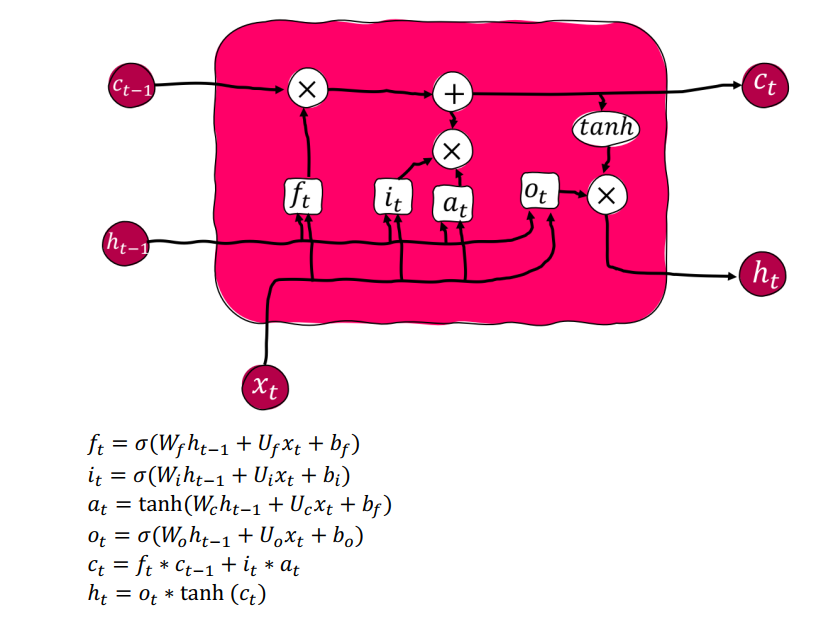

In [ ]:
img=cv2.imread('LSTM.PNG')
cv2_imshow(img)

In [ ]:
#Build the LSTM model

model=Sequential()
model.add(LSTM(50, return_sequences=True , input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the Model
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
# Train the Model
model.fit(x_train,y_train,batch_size=1,epochs=1)

2025/2148 [===========================>..] - ETA: 5s - loss: 8.4367e-04

In [ ]:
img_2=cv2.imread('Project_2.PNG')
cv2_imshow(img_2)

**Data testing and validation, and stock market prediction**

In [ ]:
# Creating the testing dataset

test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

a=print(test_data.shape)
b=print(y_test.shape)
y_test


In [ ]:
#convert x_test to numpy arrays
x_test=np.array(x_test)

In [ ]:
# Reshape x_test

x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Prediction
predictions=model.predict(x_test)
predictions=scalar.inverse_transform(predictions)

In [ ]:
# The root mean squared error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.0616268981822823

In [ ]:
#Plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)' , fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
e= print(train.shape)
s=print(valid.shape)

In [ ]:
# Show the valid and predicted prices
valid

In [ ]:
img_3=cv2.imread('Project_3.PNG')
cv2_imshow(img_3)

**Applying Moving Average and Exponential Moving Average indicators on stock market data**

**Formula for the Simple Moving Average indicator**

In [ ]:
img_1=cv2.imread('SMA.PNG')
cv2_imshow(img_1)


**Formula for the Exponential Moving Average indicator**

In [ ]:
img_2=cv2.imread('EMA.PNG')
cv2_imshow(img_2)

In [ ]:
# Create a function for calculation Moving Average(MA)
def MA(data,period=30,column='Close'):
  return data[column].rolling(window=period).mean()


In [ ]:
# Create a function for calculation Exponential Moving Average(EMA)
def EMA(data,period=30,column='Close'):
  return data[column].ewm(span=period).mean()


In [ ]:
# Create two new columns for storing the 20 day and 50 day MA
df['MA20']=MA(df,20)
df['MA50']=MA(df,50)

In [ ]:
# Create two new columns for storing the 20 day and 50 day MA
df['EMA20']=EMA(df,20)
df['EMA50']=EMA(df,50)

In [ ]:
# Get the buy and sell signals

df['Signal']=np.where(df['MA20']>df['MA50'],1,0)
df['Position']=df['Signal'].diff()

df['Buy']=np.where(df['Position']==1, df['Close'] , np.NAN)
df['Sell']=np.where(df['Position']==-1, df['Close'], np.NAN)


In [ ]:
# Get the buy and sell signals

df['Signal']=np.where(df['EMA20']>df['EMA50'],1,0)
df['Position']=df['Signal'].diff()

df['Buy']=np.where(df['Position']==1, df['Close'] , np.NAN)
df['Sell']=np.where(df['Position']==-1, df['Close'], np.NAN)


In [ ]:
#Show the Close price with the MA ,WMA,EMA and Buy and Sell signals
plt.figure(figsize=(16,8))
plt.title('Close Price History Buy and & Sell Signals' , fontsize=18)
plt.plot(df['Close'], alpha=0.5 , label='Close')
plt.plot(df['MA20'], alpha=0.5 , label='MA20')
plt.plot(df['MA50'], alpha=0.5 , label='MA50')
plt.plot(df['EMA20'], alpha=0.5 , label='EMA20')
plt.plot(df['EMA50'], alpha=0.5 , label='EMA50')


plt.scatter(df.index,df['Buy'], alpha=1, label='Buy Signal', marker='^',color='green')

plt.scatter(df.index,df['Sell'], alpha=1, label='Sell Signal', marker='^',color='red')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [ ]:
img_4=cv2.imread('Project_4.PNG')
cv2_imshow(img_4)